Calculos


In [182]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [183]:
datasetDD = pd.read_excel("Datos_02.xlsx", sheet_name="Estaturas")
datasetDD.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 55 entries, 0 to 54
Data columns (total 1 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Estaturas  55 non-null     float64
dtypes: float64(1)
memory usage: 572.0 bytes


In [184]:
estaturas = datasetDD["Estaturas"]
n = len(estaturas)
k = int(np.ceil(np.log2(n) + 1))

min_estatura = estaturas.min()
max_estatura = estaturas.max()
rango = max_estatura - min_estatura
ancho_intervalo = rango / k

bins = np.arange(min_estatura, max_estatura + ancho_intervalo, ancho_intervalo)
frecuencias, _ = np.histogram(estaturas, bins=bins)
intervalos = [f'{bins[i]:.2f} - {bins[i+1]:.2f}' for i in range(len(bins)-1)]

frecuenciaCD = pd.DataFrame({
    'Intervalo': intervalos,
    'Frecuencia_absoluta': frecuencias
})

frecuenciaCD["Frecuencia_acumulada_absoluta"] = frecuenciaCD["Frecuencia_absoluta"].cumsum()
frecuenciaCD["Frecuencia_relativa"] = frecuenciaCD["Frecuencia_absoluta"] / n
frecuenciaCD["Frecuencia_acumulada_relativa"] = frecuenciaCD["Frecuencia_relativa"].cumsum()

print(frecuenciaCD)

     Intervalo  Frecuencia_absoluta  Frecuencia_acumulada_absoluta  \
0  1.50 - 1.56                    5                              5   
1  1.56 - 1.62                    7                             12   
2  1.62 - 1.68                   14                             26   
3  1.68 - 1.75                   10                             36   
4  1.75 - 1.81                   13                             49   
5  1.81 - 1.87                    0                             49   
6  1.87 - 1.93                    5                             54   

   Frecuencia_relativa  Frecuencia_acumulada_relativa  
0             0.090909                       0.090909  
1             0.127273                       0.218182  
2             0.254545                       0.472727  
3             0.181818                       0.654545  
4             0.236364                       0.890909  
5             0.000000                       0.890909  
6             0.090909                       0.

In [185]:
media = estaturas.mean()
mediana = estaturas.median()
minimo = estaturas.min()           #Cuantitativas
maximo = estaturas.max()
moda = estaturas.mode().tolist()

print(f"Media: {media}")
print(f"Mediana: {mediana}")
print(f"Mínimo: {minimo}")
print(f"Máximo: {maximo}")
print(f"Moda: {moda}")



Media: 1.7061818181818182
Mediana: 1.69
Mínimo: 1.5
Máximo: 1.93
Moda: [1.67]


Graficos


([0, 1, 2, 3, 4, 5, 6],
 [Text(0, 0, '1.50 - 1.56'),
  Text(1, 0, '1.56 - 1.62'),
  Text(2, 0, '1.62 - 1.68'),
  Text(3, 0, '1.68 - 1.75'),
  Text(4, 0, '1.75 - 1.81'),
  Text(5, 0, '1.81 - 1.87'),
  Text(6, 0, '1.87 - 1.93')])

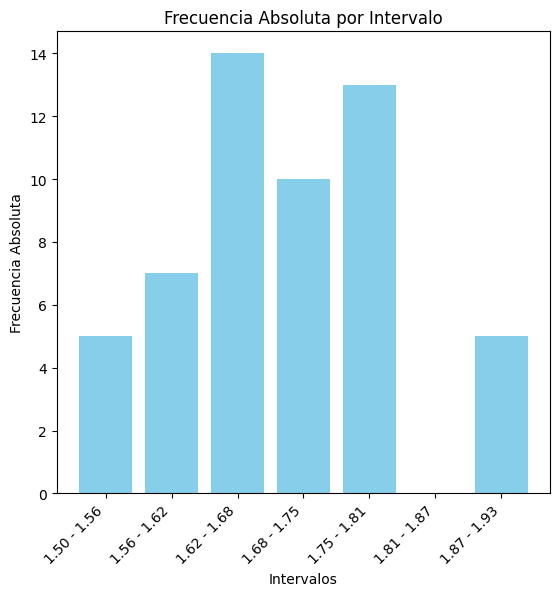

In [186]:
plt.figure(figsize=(14, 6))
plt.subplot(1, 2, 2)
plt.bar(frecuenciaCD['Intervalo'], frecuenciaCD['Frecuencia_absoluta'], color='skyblue')
plt.xlabel('Intervalos')
plt.ylabel('Frecuencia Absoluta')
plt.title('Frecuencia Absoluta por Intervalo')
plt.xticks(rotation=45, ha='right')

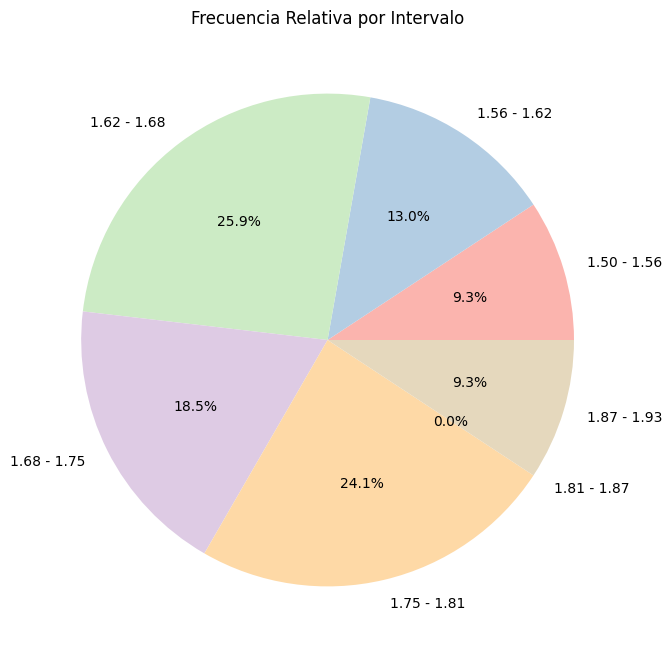

In [187]:
plt.figure(figsize=(8, 8))
plt.pie(frecuenciaCD['Frecuencia_relativa'], labels=frecuenciaCD['Intervalo'], autopct='%1.1f%%', 
        colors=plt.get_cmap('Pastel1').colors)
plt.title('Frecuencia Relativa por Intervalo')
plt.show()

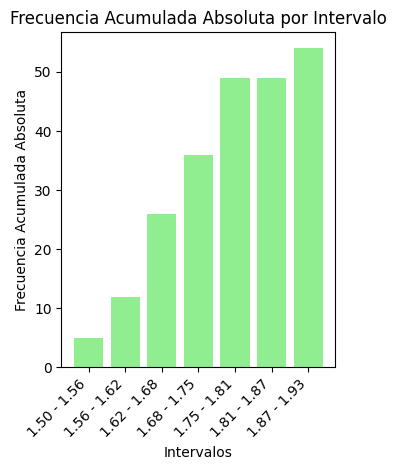

In [188]:
plt.subplot(1, 2, 2)
plt.bar(frecuenciaCD['Intervalo'], frecuenciaCD['Frecuencia_acumulada_absoluta'], color='lightgreen')
plt.xlabel('Intervalos')
plt.ylabel('Frecuencia Acumulada Absoluta')
plt.title('Frecuencia Acumulada Absoluta por Intervalo')
plt.xticks(rotation=45, ha='right')
plt.tight_layout() 
plt.show()

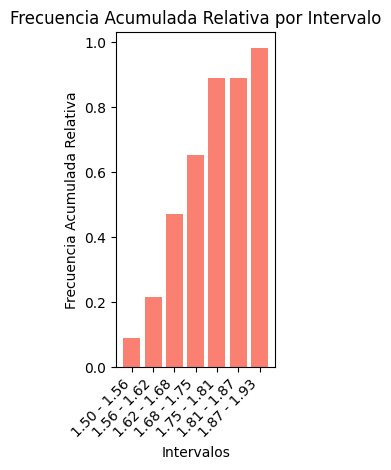

In [189]:
plt.subplot(1, 3, 3)
plt.bar(frecuenciaCD['Intervalo'], frecuenciaCD['Frecuencia_acumulada_relativa'], color='salmon')
plt.xlabel('Intervalos')
plt.ylabel('Frecuencia Acumulada Relativa')
plt.title('Frecuencia Acumulada Relativa por Intervalo')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

Conclusion

La frecuencia absoluta muestra que el intervalo de estaturas de 1.62 a 1.68 cm tiene la mayor cantidad de observaciones, con 14 casos. 
Este intervalo también presenta la mayor frecuencia acumulada absoluta de 26, indicando que la mayoría de las estaturas caen dentro de este rango. 
La frecuencia relativa más alta es de 0.254, correspondiente al mismo intervalo, lo que significa que aproximadamente el 25.4% de las estaturas se encuentran en este rango. 
La frecuencia acumulada relativa alcanza el 98.2% en el último intervalo de 1.87 a 1.93 cm, sugiriendo que la mayoría de las estaturas están distribuidas en los primeros intervalos, con pocos casos en el intervalo final. 
La estatura más frecuente es de 1.75 a 1.81 cm, con una frecuencia acumulada absoluta de 49.